In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib as mpl

grayImage = r'D:\py\python\Computer Vision\Image\albert-einstein_gray.jpg';
colourImage = r'D:\py\python\Computer Vision\Image\tulips.jpg';
affineWarped = r'D:\py\python\Computer Vision\Image\albert-einstein_Affine_warped.jpg';
projectiveWarped = r'D:\py\python\Computer Vision\Image\albert-einstein_Projective_warped.jpg';

I_gray = cv2.imread(grayImage, cv2.IMREAD_GRAYSCALE);
I_BGR = cv2.imread(colourImage);
I_affineWarped = cv2.imread(affineWarped, cv2.IMREAD_GRAYSCALE)
I_projectiveWarped = cv2.imread(projectiveWarped, cv2.IMREAD_GRAYSCALE)

In [2]:
def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi'];
    H, W = I.shape[0:2];
    figSize = W/float(dpi), H/float(dpi);
    fig = plt.figure(figsize = figSize);
    ax = fig.add_axes([0, 0, 1, 1]);
    ax.axis('off');
    ax.imshow(I, cmap='gray');
    plt.show;

In [3]:
def f_bilinearInterpolate(r, c, I):
    lc = int(c);
    rc = lc + 1;
    wr = c - lc;
    wl = rc - c;
    tr = int(r);
    br = tr + 1;
    wt = br - r;
    wb = r - tr;
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]:
        a = wl*I[tr, lc] + wr*I[tr, rc];
        b = wl*I[br, lc] + wr*I[br, rc];
        g = wt*a + wb*b;
        return np.uint8(g);
    else:
        return 0;

In [4]:
def f_getextentsProjective(T, rMax, cMax):
    Cords = np.array([[0, 0, 1], [0, cMax-1, 1], [rMax-1, 0, 1], [rMax-1, cMax-1, 1]]);
    A_dash = T.dot(Cords.T);
    A_dash = A_dash/A_dash[2, :];
    mins = A_dash.min(axis=1);
    maxs = A_dash.max(axis=1);
    minR = np.int64(np.floor(mins[0]));
    minC = np.int64(np.floor(mins[1]));
    maxR = np.int64(np.ceil(maxs[0]));
    maxC = np.int64(np.ceil(maxs[1]));
    H = maxR - minR + 1;
    W = maxC - minC + 1;
    return minR, minC, maxR, maxC, H, W;

In [5]:
def f_transformProjective(T, I_gray):
    rMax = I_gray.shape[0];
    cMax = I_gray.shape[1];
    minR, minC, maxR, maxC, H, W = f_getextentsProjective(T, rMax,cMax);
    I2 = np.zeros((H, W), dtype='uint8');
    Tinv = np.linalg.inv(T);
    for new_i in range(minR, maxR):
        for new_j in range(minC, maxC):
            P_dash = np.array([new_i, new_j, 1]);
            P = Tinv.dot(P_dash);
            P = P/P[2];
            i = P[0];
            j = P[1];
            if i < 0 or i >= rMax or j < 0 or j >= cMax:
                pass
            else:
                g = f_bilinearInterpolate(i, j, I_gray);
                I2[new_i - minR, new_j - minC] = g;
    return I2;

In [6]:
def f_getPoints(I, numPts):
    %matplotlib
    fig, ax = plt.subplots(1, figsize = (15, 30));
    plt.imshow(I, cmap='gray');
    pts = np.round(np.array(plt.ginput(n = numPts)));
    pts = pts[:, [1, 0]].T;
    plt.close();
    return pts;

In [7]:
P  = f_getPoints(I_gray, 3);

Using matplotlib backend: <object object at 0x0000015F17162660>


In [8]:
P

array([[399., 400., 478.],
       [318., 502., 439.]])

In [9]:
P_dash = f_getPoints(I_affineWarped, 3);

Using matplotlib backend: QtAgg


In [10]:
P_dash

array([[491., 475., 565.],
       [389., 533., 512.]])

In [11]:
P = np.vstack((P, np.ones((1, 3))))

In [12]:
P

array([[399., 400., 478.],
       [318., 502., 439.],
       [  1.,   1.,   1.]])

In [13]:
P_dash = np.vstack((P_dash, np.ones((1, 3))))

In [14]:
np.linalg.det(P)

-14415.000000000007

In [15]:
A = P_dash.dot(np.linalg.inv(P))

In [16]:
I2 = f_transformProjective(A, I_gray)
plt.imshow(I2, cmap='gray')

In [17]:
P  = f_getPoints(I_gray, 5);

Using matplotlib backend: QtAgg


In [18]:
P_dash  = f_getPoints(I_affineWarped, 5);

Using matplotlib backend: QtAgg


In [19]:
P = np.vstack((P, np.ones((1, 5))))

In [20]:
P_dash = np.vstack((P_dash, np.ones((1, 5))))

In [21]:
A = P_dash.dot(P.T).dot(np.linalg.inv(P.dot(P.T)))

In [22]:
I2 = f_transformProjective(A, I_gray)

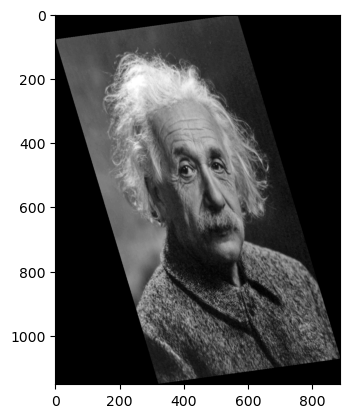

In [23]:
%matplotlib inline
plt.imshow(I2, cmap='gray')

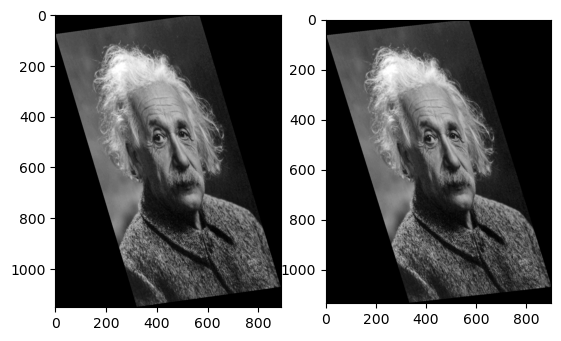

In [24]:
plt.figure(1)
plt.subplot(121)
plt.imshow(I2, cmap='gray')
plt.subplot(122)
plt.imshow(I_affineWarped, cmap='gray')
plt.show()

In [25]:
P  = f_getPoints(I_gray, 3);

Using matplotlib backend: QtAgg


In [26]:
P_dash = f_getPoints(I_affineWarped, 3);

Using matplotlib backend: QtAgg


In [27]:
P = np.vstack((P, np.ones((1, 3))))
P_dash = np.vstack((P_dash, np.ones((1, 3))))

A = P_dash.dot(np.linalg.inv(P))

cmImage = r'D:\py\python\Computer Vision\Image\cm.jpg'
I_cm = cv2.imread(cmImage, cv2.IMREAD_GRAYSCALE)

I2 = f_transformProjective(A, I_cm)
plt.imshow(I2, cmap='gray')

In [28]:
P  = f_getPoints(I_gray, 3);

Using matplotlib backend: QtAgg


In [29]:
P_dash = f_getPoints(I_projectiveWarped, 3);

Using matplotlib backend: QtAgg


In [30]:
P = np.vstack((P, np.ones((1, 3))))
P_dash = np.vstack((P_dash, np.ones((1, 3))))

H = P_dash.dot(np.linalg.inv(P))

In [31]:
I2 = f_transformProjective(H, I_gray)

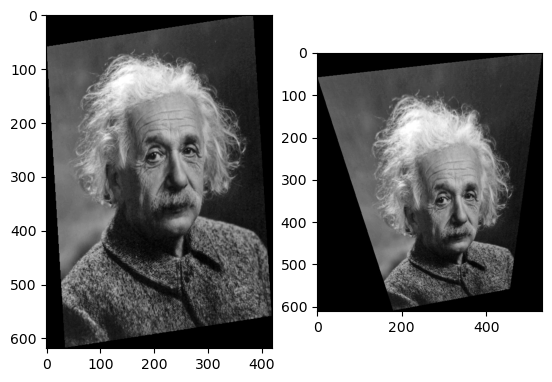

In [32]:
%matplotlib inline
plt.subplot(121)
plt.imshow(I2, cmap='gray')
plt.subplot(122)
plt.imshow(I_projectiveWarped, cmap='gray')
plt.show()

In [34]:
def f_computeRightNullSpace(A):
    B = A.T.dot(A)
    w,v = np.linalg.eig(B)
    idx = np.argmin(w)
    nullVector = v[:, idx]
    return nullVector

In [35]:
A = np.random.rand(3, 4)

In [36]:
nv = f_computeRightNullSpace(A)

In [62]:
P  = f_getPoints(I_gray, 6);

Using matplotlib backend: QtAgg


In [63]:
P_dash = f_getPoints(I_projectiveWarped, 6);

Using matplotlib backend: QtAgg


In [64]:
P = np.vstack((P, np.ones((1, 6))))
P_dash = np.vstack((P_dash, np.ones((1, 6))))

In [65]:
A = np.zeros((12, 9))

In [66]:
A[::2, :3] = -P.T
A[1::2, 3:6] = -P.T
A[::2, 6:] = P.dot(np.diag(P_dash[0,:])).T
A[1::2, 6:] = P.dot(np.diag(P_dash[1,:])).T

In [67]:
h = f_computeRightNullSpace(A)

In [59]:
H = np.reshape(h, (3, 3))

In [68]:
I2 = f_transformProjective(H, I_gray)

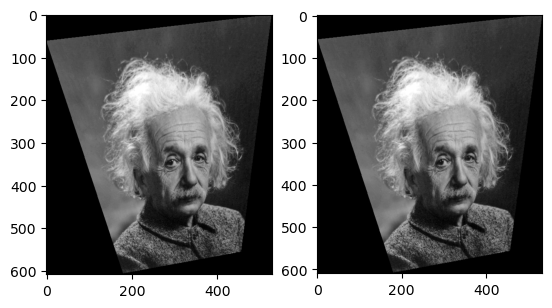

In [69]:
%matplotlib inline
plt.subplot(121)
plt.imshow(I2, cmap='gray')
plt.subplot(122)
plt.imshow(I_projectiveWarped, cmap='gray')
plt.show()

In [70]:
I2 = f_transformProjective(H, I_cm)

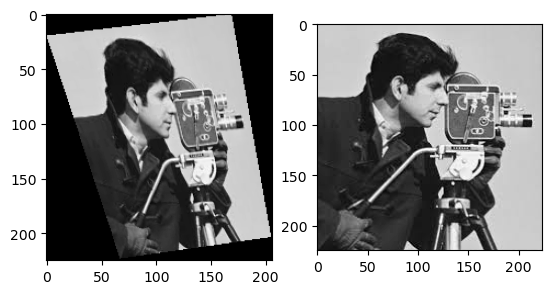

In [71]:
%matplotlib inline
plt.subplot(121)
plt.imshow(I2, cmap='gray')
plt.subplot(122)
plt.imshow(I_cm, cmap='gray')
plt.show()

In [72]:
im1 = cv2.imread(r'D:\py\python\Computer Vision\Image\1.jpg')
im2 = cv2.imread(r'D:\py\python\Computer Vision\Image\2.jpg')
im3 = cv2.imread(r'D:\py\python\Computer Vision\Image\3.jpg')

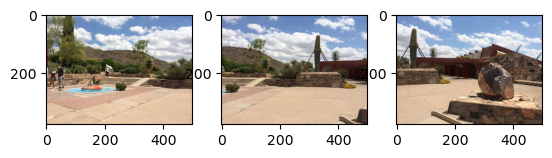

In [73]:
plt.subplot(131)
plt.imshow(im1[:, :, ::-1])
plt.subplot(132)
plt.imshow(im2[:, :, ::-1])
plt.subplot(133)
plt.imshow(im3[:, :, ::-1])
plt.show()

In [74]:
imgs = []
imgs.append(im1)
imgs.append(im2)
imgs.append(im3)
M = cv2.Stitcher.create(cv2.Stitcher_PANORAMA)
status,pano = M.stitch(imgs)

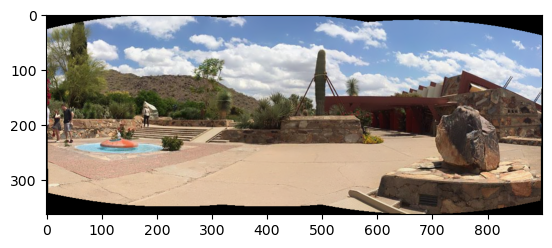

In [75]:
plt.imshow(pano[:,:, ::-1])